## Homework #5 ##

In [91]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from time import time
from copy import deepcopy

from JobShopScheduling import JSSP
from GeneticAlgorithm import genetic_algorithm
from ModifiedGeneticAlgorithm import modified_genetic_algorithm
from SimulatedAnnealing import SAsearch
from Particle import particle_swarm_optimization
from randomSearch import randomSearch

np.random.seed(0)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Test case 4x4 and 10x10

In [60]:
# optimal = 18
proc_time_4x4 = np.array([[1,4,2,1],[2,3,6,2],[3,7,2,3],[4,1,5,8]])

# optimal = 184
proc_time_10x10 = np.array([[ 7,  9,  2,  1, 10, 14, 17, 11,  6, 11],
                           [19, 12, 16,  5, 16,  3, 10,  9,  8, 19],
                           [15,  8, 12,  9,  5,  1,  1, 18,  6,  8],
                           [ 6,  6, 13, 10, 16,  7, 18, 15, 16, 17],
                           [ 4, 13,  9,  6, 17, 12, 18, 13, 11,  1],
                           [ 7, 14, 13,  9, 10, 13,  1, 11, 12,  4],
                           [17,  2, 18, 16, 14,  3,  7, 15, 18,  3],
                           [ 7,  9,  8, 12,  2,  9,  3, 10, 17,  9],
                           [17,  2,  2,  2, 19, 17, 12,  9, 19,  7],
                           [ 4, 10, 10,  3, 17,  3, 16,  3, 12,  4]])

In [61]:
job_4x4 = JSSP(4,4,proc_time_4x4)
job_10x10 = JSSP(10,10,proc_time_10x10)

In [62]:
# Store the result
result = {"GA":{"4x4": [None, None, None],
              "10x10": [None, None, None]},
        "MGA":{"4x4": [None, None, None],
              "10x10": [None, None, None]},
        "SA":{"4x4": [None, None, None],
              "10x10": [None, None, None]},
        "PSO":{"4x4": [None, None, None],
              "10x10": [None, None, None]}} 

### Genetic Algorithm

##### 4x4 test

Best makespan: 18.0
Time used: 1.2807202339172363


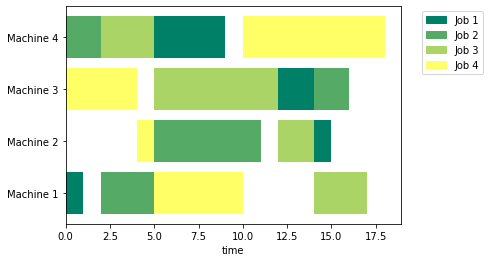

[Text(0.5, 0, 'iterations'), Text(0, 0.5, 'Makespan')]

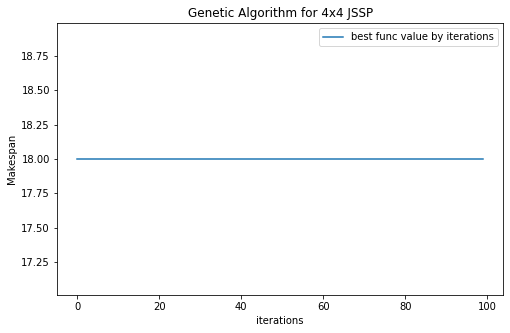

In [63]:
res, stats = genetic_algorithm(job_4x4, max_iter=100, pop_size=50)
print("Best makespan:", job_4x4.get_end_time(res))
print("Time used:", stats[1])
job_4x4.plot(res)
result["GA"]["4x4"] = [job_4x4.get_end_time(res), stats[0], stats[1]]

_, axs1 = plt.subplots(1,1,figsize=(8,5))

axs1.set_title('Genetic Algorithm for 4x4 JSSP')
axs1.plot(stats[0], label = "best func value by iterations")
# axs1.plot(rand_time, '.-',label = "random samples")
axs1.legend(loc='upper right')
axs1.set(xlabel='iterations', ylabel='Makespan')

##### 10x10 test

Best makespan: 184.0
Time used: 11.365516185760498


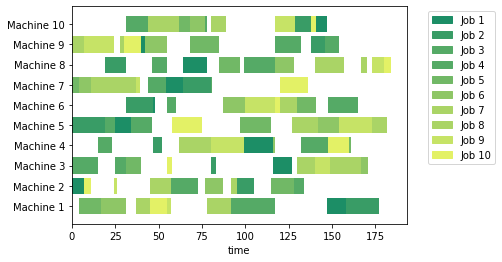

[Text(0.5, 0, 'iterations'), Text(0, 0.5, 'Makespan')]

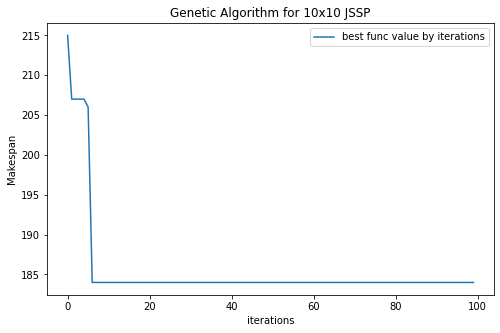

In [64]:
res, stats = genetic_algorithm(job_10x10, max_iter=100, pop_size=100)
print("Best makespan:", job_10x10.get_end_time(res))
print("Time used:",stats[1])
job_10x10.plot(res)
result["GA"]["10x10"] = [job_10x10.get_end_time(res), stats[0], stats[1]]

_, axs1 = plt.subplots(1,1,figsize=(8,5))

axs1.set_title('Genetic Algorithm for 10x10 JSSP')
axs1.plot(stats[0], label = "best func value by iterations")
# axs1.plot(rand_time, '.-',label = "random samples")
axs1.legend(loc='upper right')
axs1.set(xlabel='iterations', ylabel='Makespan')

### Modified Genetic Algorithm

##### 4x4 test

Best makespan: 24.0
Time used: 15.98373031616211


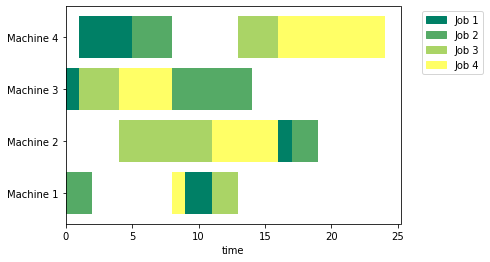

[Text(0.5, 0, 'iterations'), Text(0, 0.5, 'Makespan')]

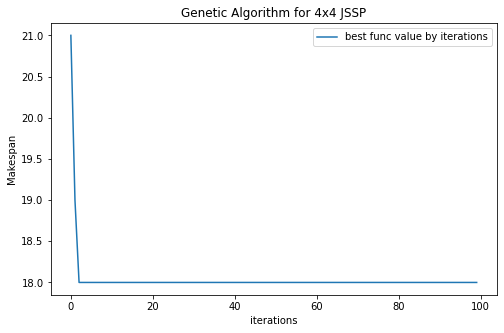

In [65]:
res, stats = modified_genetic_algorithm(job_4x4, max_iter=100, pop_size=50)
print("Best makespan:", job_4x4.get_end_time(res))
print("Time used:", stats[1])
job_4x4.plot(res)
result["MGA"]["4x4"] = [job_4x4.get_end_time(res), stats[0], stats[1]]

_, axs1 = plt.subplots(1,1,figsize=(8,5))

axs1.set_title('Genetic Algorithm for 4x4 JSSP')
axs1.plot(stats[0], label = "best func value by iterations")
# axs1.plot(rand_time, '.-',label = "random samples")
axs1.legend(loc='upper right')
axs1.set(xlabel='iterations', ylabel='Makespan')

##### 10x10 test

Best makespan: 216.0
Time used: 1547.3474209308624


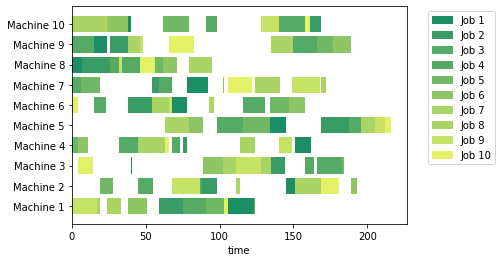

[Text(0.5, 0, 'iterations'), Text(0, 0.5, 'Makespan')]

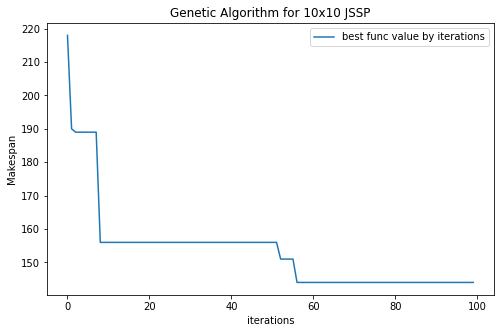

In [66]:
res, stats = modified_genetic_algorithm(job_10x10, max_iter=100, pop_size=100)
print("Best makespan:", job_10x10.get_end_time(res))
print("Time used:",stats[1])
job_10x10.plot(res)
result["MGA"]["10x10"] = [job_10x10.get_end_time(res), stats[0], stats[1]]

_, axs1 = plt.subplots(1,1,figsize=(8,5))

axs1.set_title('Genetic Algorithm for 10x10 JSSP')
axs1.plot(stats[0], label = "best func value by iterations")
# axs1.plot(rand_time, '.-',label = "random samples")
axs1.legend(loc='upper right')
axs1.set(xlabel='iterations', ylabel='Makespan')

### Simulated Annealing

##### 4x4 test

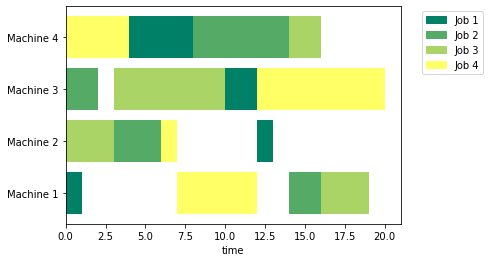

Best makespan: 20.0
Time used: 9.468428373336792


[Text(0.5, 0, 'iterations'), Text(0, 0.5, 'Makespan')]

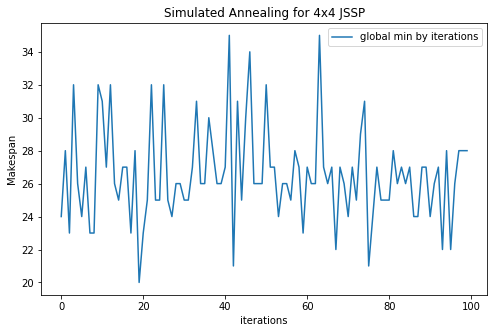

In [99]:
start = time()
cost, seq, ys = SAsearch(job_4x4, loopcount=100, T=200, maxIter=10, halting=10, decrease=0.8, mode="random")
t = time() - start
job_4x4.plot(seq)
print("Best makespan:", cost)
print("Time used:", t)
result["SA"]["4x4"] = [cost, ys, t]

_, axs = plt.subplots(1,1,figsize=(8,5))
axs.set_title('Simulated Annealing for 4x4 JSSP')
axs.plot(ys, label = "global min by iterations")
# axs.plot(rand_time, '.-',label = "random samples")
axs.legend(loc='upper right')
axs.set(xlabel='iterations', ylabel='Makespan')

##### 10x10 test

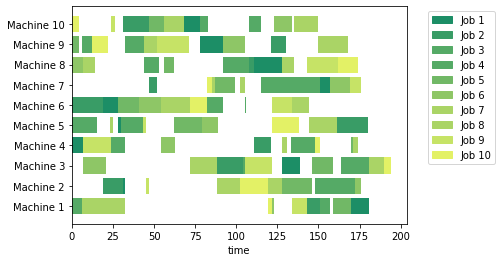

Best makespan: 176.0
Time used: 299.9814147949219


[Text(0.5, 0, 'iterations'), Text(0, 0.5, 'Makespan')]

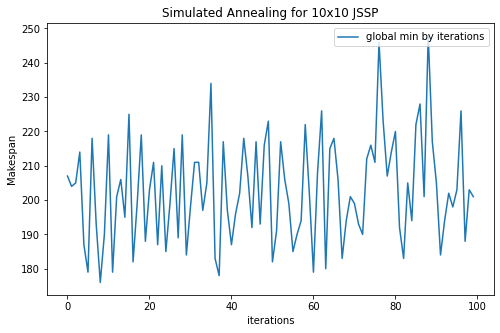

In [100]:
start = time()
cost, seq, ys = SAsearch(job_10x10, loopcount=100, T=200, maxIter=10, halting=10, decrease=0.8,mode="random")
t = time() - start
job_10x10.plot(seq)

print("Best makespan:", cost)
print("Time used:", t)
result["SA"]["10x10"] = [cost, ys, t]

_, axs = plt.subplots(1,1,figsize=(8,5))
axs.set_title('Simulated Annealing for 10x10 JSSP')
axs.plot(ys, label = "global min by iterations")
# axs.plot(rand_time, '.-',label = "random samples")
axs.legend(loc='upper right')
axs.set(xlabel='iterations', ylabel='Makespan')

### Particle Swarm Optimization

##### 4x4 test

Best makespan: 20.0
Time used: 0.25673365592956543


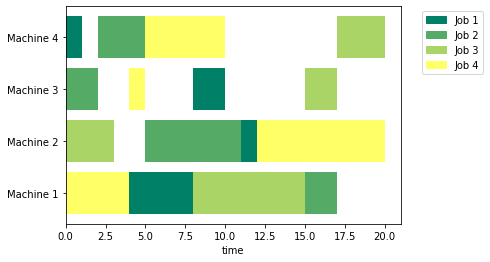

[Text(0.5, 0, 'iterations'), Text(0, 0.5, 'Makespan')]

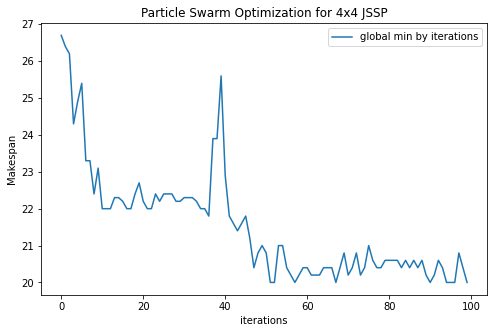

In [101]:
start = time()
opts, results = job_4x4.PSO(10)
time_used = time() - start

result["PSO"]["4x4"] = [job_4x4.get_end_time(np.argsort(opts[0].x)), results, time_used]
print("Best makespan:", job_4x4.get_end_time(np.argsort(opts[0].x)))
print("Time used:", time_used)
job_4x4.plot(np.argsort(opts[0].x))

_, axs = plt.subplots(1,1,figsize=(8,5))
axs.set_title('Particle Swarm Optimization for 4x4 JSSP')
axs.plot(results, label = "global min by iterations")
# axs.plot(rand_time, '.-',label = "random samples")
axs.legend(loc='upper right')
axs.set(xlabel='iterations', ylabel='Makespan')

##### 10x10 test

Best makespan: 179.0
Time used: 0.9433882236480713


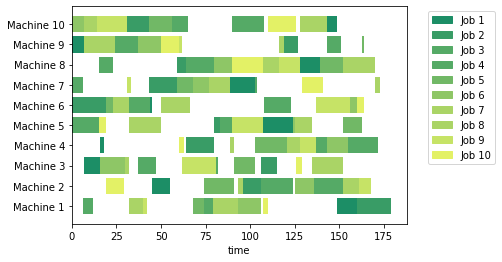

[Text(0.5, 0, 'iterations'), Text(0, 0.5, 'Makespan')]

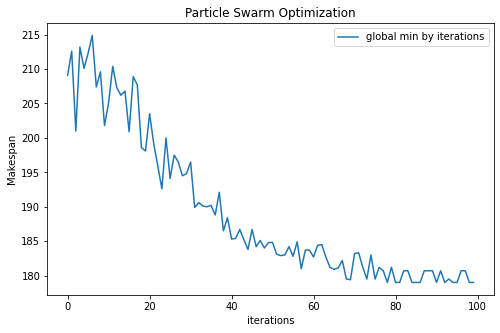

In [102]:
start = time()
opts, results = job_10x10.PSO(10)
time_used = time() - start
new_seq = [job_10x10.generate_rand_seq() for _ in range(100)]
rand_time = np.array([job_10x10.get_end_time(s) for s in new_seq])

result["PSO"]["10x10"] = [job_10x10.get_end_time(np.argsort(opts[0].x)), results, time_used]
print("Best makespan:", job_10x10.get_end_time(np.argsort(opts[0].x)))
print("Time used:", time_used)
job_10x10.plot(np.argsort(opts[0].x))

_, axs = plt.subplots(1,1,figsize=(8,5))
axs.set_title('Particle Swarm Optimization')
axs.plot(results, label = "global min by iterations")
# axs.plot(rand_time, '.-',label = "random samples")
axs.legend(loc='upper right')
axs.set(xlabel='iterations', ylabel='Makespan')

### Summery

In [103]:
print("4x4 JSSP")
for alg in result:
    print(alg, "best_makespan =", result[alg]["4x4"][0], "   time used =",  result[alg]["4x4"][2])
    
print("10x10 JSSP")
for alg in result:
    print(alg, "best_makespan =", result[alg]["10x10"][0], "   time used =",  result[alg]["10x10"][2])

4x4 JSSP
GA best_makespan = 18.0    time used = 1.2807202339172363
MGA best_makespan = 24.0    time used = 15.98373031616211
SA best_makespan = 20.0    time used = 9.468428373336792
PSO best_makespan = 20.0    time used = 0.25673365592956543
10x10 JSSP
GA best_makespan = 184.0    time used = 11.365516185760498
MGA best_makespan = 216.0    time used = 1547.3474209308624
SA best_makespan = 176.0    time used = 299.9814147949219
PSO best_makespan = 179.0    time used = 0.9433882236480713


[Text(0.5, 0, 'iterations'), Text(0, 0.5, 'Makespan')]

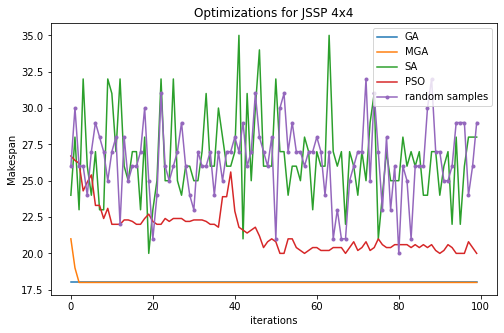

In [104]:
# baseline: random search
new_seq = [job_4x4.generate_rand_seq() for _ in range(100)]
rand_time = np.array([job_4x4.get_end_time(s) for s in new_seq])

fig, ax = plt.subplots(figsize=(8,5))
ax.set_title('Optimizations for JSSP 4x4')
for alg in result:
    ax.plot(result[alg]["4x4"][1], label = alg)
ax.plot(rand_time, '.-',label = "random samples")
ax.legend(loc='upper right')
ax.set(xlabel='iterations', ylabel='Makespan')

[Text(0.5, 0, 'iterations'), Text(0, 0.5, 'Makespan')]

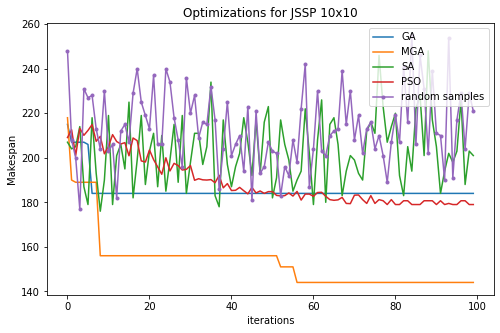

In [105]:
# baseline: random search
new_seq = [job_10x10.generate_rand_seq() for _ in range(100)]
rand_time = np.array([job_10x10.get_end_time(s) for s in new_seq])

fig, ax = plt.subplots(figsize=(8,5))
ax.set_title('Optimizations for JSSP 10x10')
for alg in result:
    ax.plot(result[alg]["10x10"][1], label = alg)
ax.plot(rand_time, '.-',label = "random samples")
ax.legend(loc='upper right')
ax.set(xlabel='iterations', ylabel='Makespan')